<a href="https://colab.research.google.com/github/reginaxy/Hotel_Analysis/blob/main/Topic_Distribution_(Interpretation_of_Topic_Model).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries, Packages and Data**

**Import Libraries & Packages**

In [ ]:
import pandas as pd
import numpy as np
from pprint import pprint

import gensim
from gensim import corpora
from gensim.models.ldamulticore import LdaMulticore
from gensim.models import CoherenceModel

from nltk.tokenize import sent_tokenize, word_tokenize
import nltk
nltk.download('punkt')

import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


**Mount to GDrive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Import Reviews (NGRAMS + Nouns only) Dataset**

In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/Hotel_Analysis/Hotel_Datasets/515k_Hotel_Reviews_NOUNS_TOKENS.csv'
df = pd.read_csv(path)
df.head(5)

,cleaned_Reviews
0,"['hotel', 'mess', 'hotel', 'star']"
1,"['change', 'sheet', 'duvet', 'everyday', 'bed'..."
2,"['price', 'brekfast']"
3,"['picture', 'room', 'room', 'quit', 'dirty', '..."
4,"['aircondition', 'sleep', 'night']"


# **Text Pre-processing**

**Remove Punctuation**

In [ ]:
df["Reviews"] = df['cleaned_Reviews'].str.replace('[^\w\s]','')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [ ]:
df

,cleaned_Reviews,Reviews
0,"['hotel', 'mess', 'hotel', 'star']",hotel mess hotel star
1,"['change', 'sheet', 'duvet', 'everyday', 'bed'...",change sheet duvet everyday bed floor body gel
2,"['price', 'brekfast']",price brekfast
3,"['picture', 'room', 'room', 'quit', 'dirty', '...",picture room room quit dirty clock room time
4,"['aircondition', 'sleep', 'night']",aircondition sleep night
...,...,...
545176,['breakfast'],breakfast
545177,"['staff', 'check', 'time']",staff check time
545178,['breakfast'],breakfast
545179,"['room', 'family', 'member', 'comfy', 'space']",room family member comfy space


**Convert dataframe to list**

In [ ]:
reviews = df["Reviews"]
reviews = reviews.tolist()

**Tokenize reviews**

In [ ]:
import string 

#Tokenize the sentence into words
reviews_tokens = [word_tokenize(t) for t in reviews]

**Create a dictionary (mapping between words and their integer ids)**

In [ ]:
dictionary = corpora.Dictionary(reviews_tokens)            

**Converts the word to its integer word id and returns the result as a sparse vector (using Doc2bow Doc term matrix)**

In [ ]:
doc_term_matrix = [dictionary.doc2bow(doc) for doc in reviews_tokens]

**Load Topic Model built (Best Model = LDA Mallet (NGRAMS + NOUNS Approach)**

In [ ]:
lda_model = gensim.models.ldamodel.LdaModel.load('/content/drive/MyDrive/Colab Notebooks/Hotel_Analysis/Topic Modelling/Topic Models/LDAmallet_NOUNS')

**Show Topics**

In [ ]:
# Show Topics
pprint(lda_model.show_topics(formatted=False))

[(13,
  [('hotel', 0.2192655667908462),
   ('work', 0.07929749866950506),
   ('pool', 0.05907397551889303),
   ('design', 0.043640234167110166),
   ('building', 0.03778605641298563),
   ('star', 0.028738690792974985),
   ('internet', 0.027674294837679615),
   ('gym', 0.021820117083555083),
   ('temperature', 0.021287919105907396),
   ('issue', 0.020755721128259713)]),
 (4,
  [('bed', 0.38918067226890757),
   ('room', 0.1717436974789916),
   ('comfy', 0.12394957983193278),
   ('pillow', 0.027836134453781514),
   ('super', 0.013130252100840336),
   ('mattress', 0.012605042016806723),
   ('air_con', 0.011029411764705883),
   ('floor', 0.008403361344537815),
   ('cosy', 0.008403361344537815),
   ('spotless', 0.008403361344537815)]),
 (16,
  [('room', 0.2653276955602537),
   ('coffee', 0.080338266384778),
   ('check', 0.06501057082452431),
   ('tea', 0.04175475687103594),
   ('problem', 0.04175475687103594),
   ('hour', 0.03276955602536998),
   ('elevator', 0.025898520084566595),
   ('airpo

**Show Topics (Word cloud visualisation)**

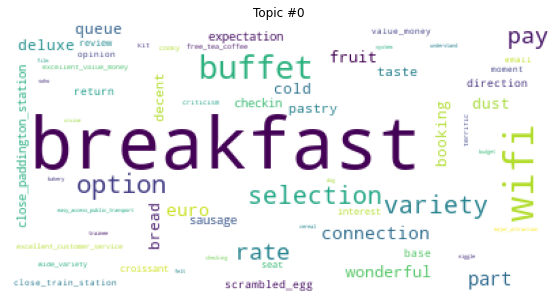

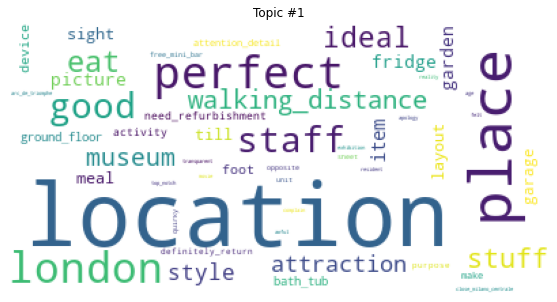

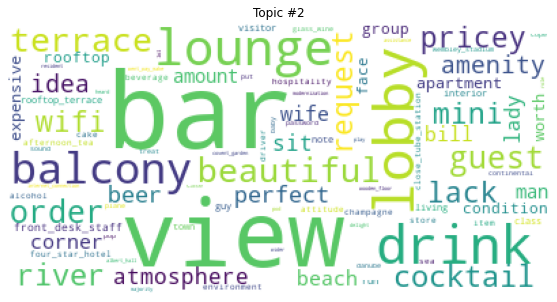

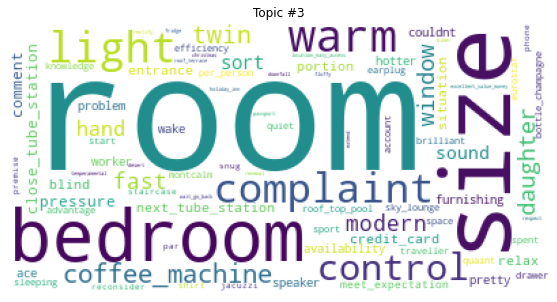

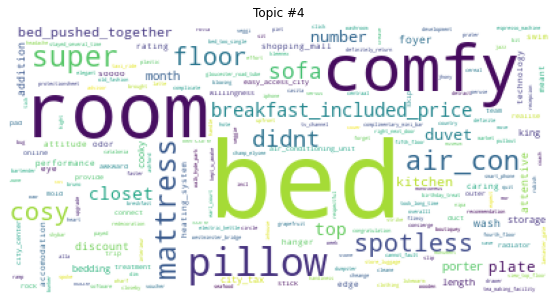

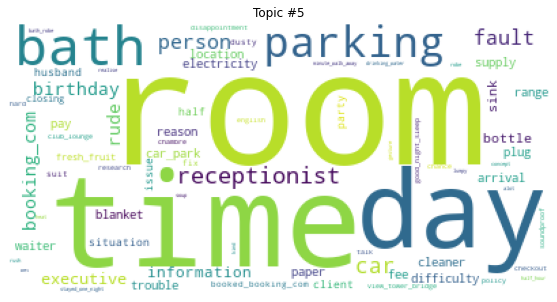

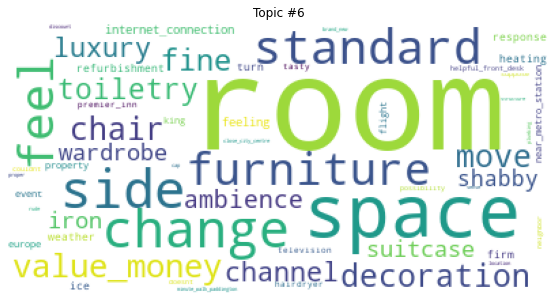

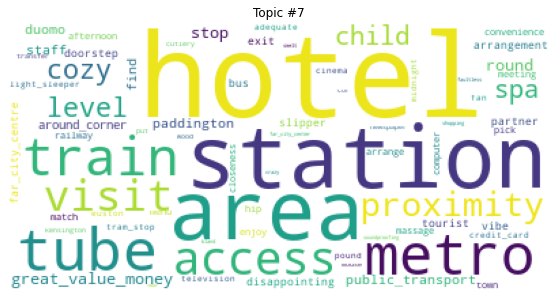

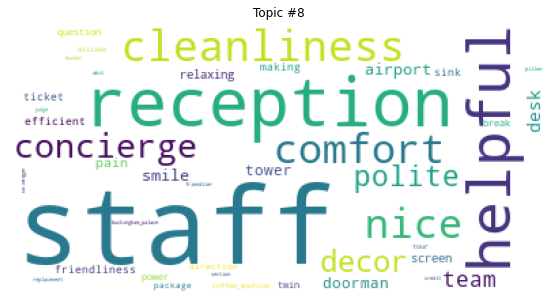

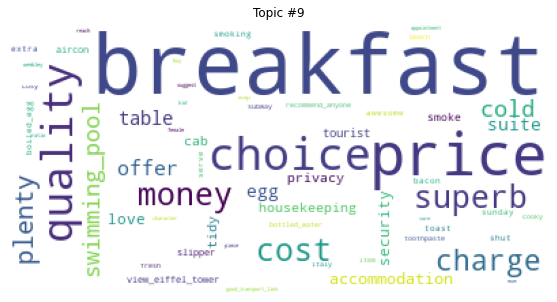

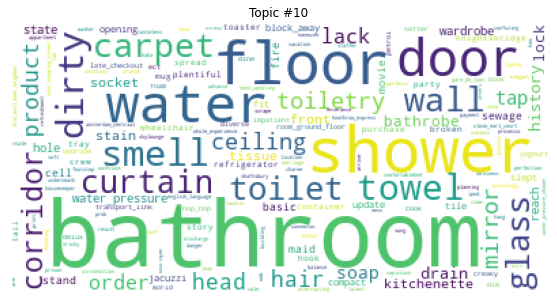

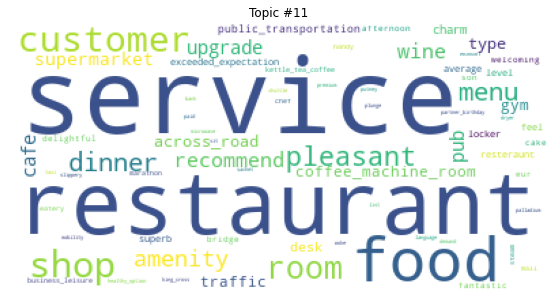

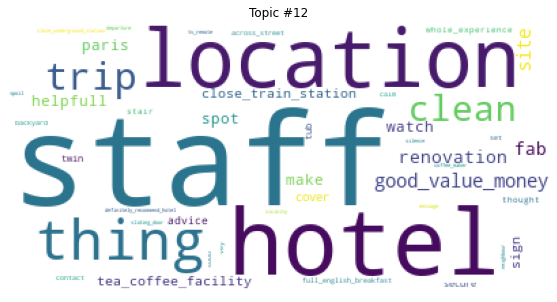

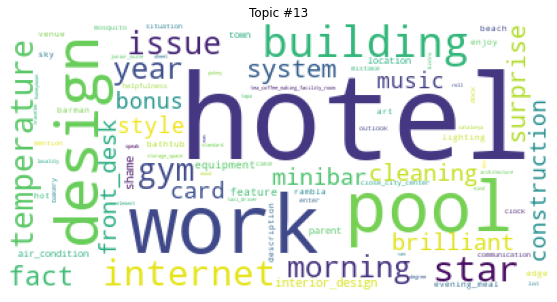

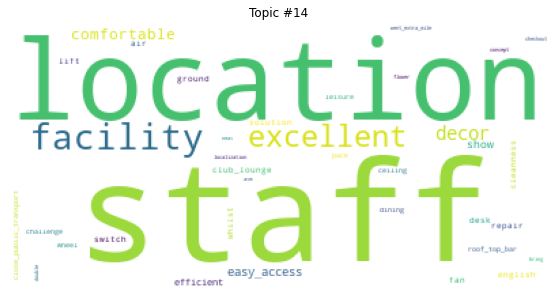

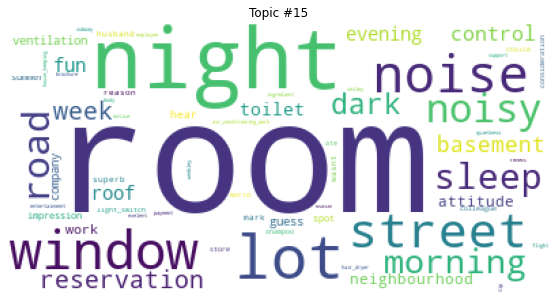

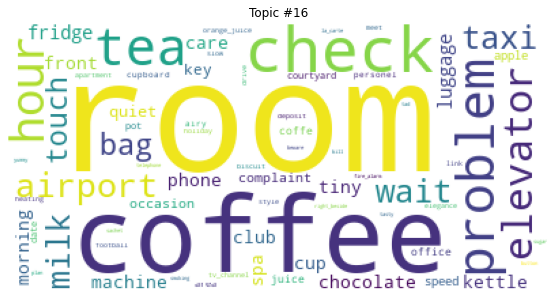

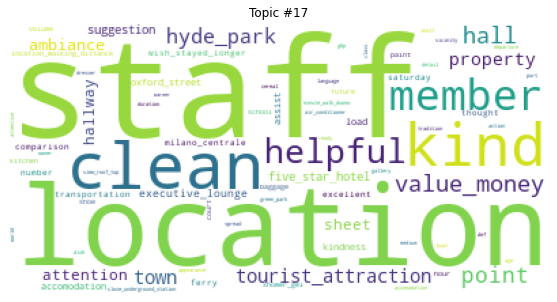

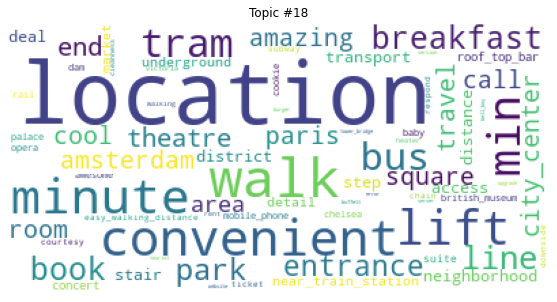

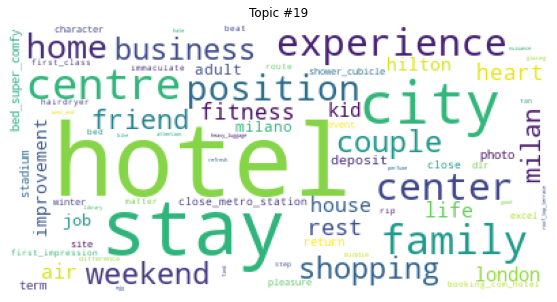

In [ ]:
for t in range(lda_model.num_topics):
    plt.figure()
    plt.imshow(WordCloud(background_color = 'white').fit_words(dict(lda_model.show_topic(t, 200))))
    plt.axis("off")
    plt.title("Topic #" + str(t))
    plt.show()
    plt.rcParams["figure.figsize"] = (20,5)

The main **disadvantage** of topic modelling is the need to interpret the topics ourselves. Although the model will display us the keywords present in the specific topic, we still need to identify the keywords in each topic, then make our inferences.

**Interpretation of each topic:**

**Topic 0:** Important Keywords: 'breakfast', 'buffet', 'selection' 'variety', 'rate', 'pay', 'option' --> Most likely reviews relating to food / dining experience.

**Topic 1:** Important Keywords: 'walking_distance', 'location', 'place' 'attraction', 'museum', 'pay', 'option' --> Most likely reviews that were talking about the convenience of the hotel to nearby attractions.

**Topic 2:** Important Keywords: 'drink', 'lounge', 'beer', 'cocktail', 'bar', 'view', 'balcony --> Most likely reviews relating to nightlife / view from hotel room.

**Topic 3:** Important Keywords: 'room', 'size', 'bedroom' --> Most likely reviews relating to the size of the hotel room.

**Topic 4:** Important Keywords: 'bed', 'comfy', 'air_con', 'sofa', 'mattress', 'cozy', 'cosy', 'pillow' 'mattress' --> Most likely reviews relating to the comfiness of the hotel's bed.

**Topic 5:** Important Keywords: 'room', 'time', 'day', 'bath', 'parking', 'hour', 'receptionist' -->  Combination / Clustering of various topics. 

**Topic 6:** Important Keywords: 'room', 'standard','luxury','space','iron','toiletry', 'furniture', 'wardrobe', 'kettle' --> Most likely reviews relating to the in-room facilities of the hotels.

**Topic 7:** Important Keywords: 'station', 'area', 'metro', 'proximity', 'tube', 'tram', 'train', 'access', 'bus', 'car', 'convenient', 'attraction', 'airport', 'public_transport' --> Most likely reviews that were talking about the convenience of the hotel to nearby attractions / the airport.

**Topic 8:** Important Keywords: 'staff', 'cleanliness', 'reception', 'helpful', 'concierge', 'polite', 'nice', 'friendliness' --> Most likely reviews relating to the reviewer's experience with the hotel's receptionist.

**Topic 9:** Important Keywords: 'breakfast', 'choice', 'price', 'money', 'quality' 'table', 'egg' wifi', 'variety' --> Most likely reviews relating to food / dining experience.

**Topic 10:** Important Keywords: 'bathroom', 'floor', 'shower', 'towel', 'water', 'toilet', 'tap' --> Most likely reviews referring to the hotel room toilet.

**Topic 11:** Important Keywords: 'service', 'restaurant', 'food', 'dinner', 'menu', 'wine' --> Most likely reviews relating to food / dining experience.

**Topic 12:** Important Keywords: 'staff', 'location', 'renovation' -->   Combination / Clustering of various topics.

**Topic 13:** Important Keywords: 'pool', 'minibar', 'design', 'gym', 'construction', 'internet'  -->  Most likely reviews relating to te hotel's facilities.

**Topic 14:** Important Keywords: 'location', 'staff', 'facility' -->   Combination / Clustering of various topics. However, this could suggest that the reviews are referring to the facility of the hotel.

**Topic 15:** Important Keywords: 'room', 'noise', 'night', 'street', 'road', 'dark', 'noisy', 'attitude' --> Most likely reviews relating to the bad experiences / problems the reviewer has faced during their stay in the hotel.

**Topic 16:** Important Keywords: 'room', 'check', 'problem', 'elevator', 'airport', 'taxi',  'coffee', 'tea', 'milk' --> Combination / Clustering of various topics. However, keywords 'coffee', 'tea', 'milk' suggest that these may be reviews relating to the coffee / tea availability in the hotel. Keywords like 'airport' and 'taxi' suggests that these are reviews relating to their trip to / from the airport to the hotel via a taxi. 'Elevator' and 'problem' suggests that the reviewers might have faced some problems with the elevator.

**Topic 17:** Important Keywords: 'staff', 'helpful', 'kind', 'location', 'clean', 'value_money', 'tourist_attention' --> Combination / Clustering of various topics. Most likely reviews relating to the reviewer's experience with the hotel's staff.

**Topic 18:** Important Keywords: 'location', 'tram', 'walk', 'convenient', 'minute', 'bus', 'city_center', 'park', 'entrance', 'travel', 'area' --> Most likely reviews that were talking about the convenience of the hotel to nearby attractions.

**Topic 19:** Important Keywords: 'hotel', 'stay', 'experience', 'stay', 'family', 'shopping', 'fitness','weekend', 'rest' --> Most likely reviews relating to the overall experience of the reviewer upon staying in the hotel.


**Import Cleaned Reviews (prior to NGRAMS + Nouns extraction) Data**

In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/Hotel_Analysis/Hotel_Datasets/515k_Hotel_Reviews_SENTIMENTS_40tokens.csv'
data = pd.read_csv(path)
data

,Review_Date,Hotel_Country,Hotel_Name,Sentiments,Reviewer_Nationality,Review,cleaned_Reviews
0,2017-07-24,Netherlands,Hotel Arena,Negative,Poland,Backyard of the hotel is total mess shouldn t...,backyard hotel total mess happen hotel star
1,2017-07-17,Netherlands,Hotel Arena,Negative,United Kingdom,Cleaner did not change our sheet and duvet ev...,cleaner change sheet duvet everyday made bed a...
2,2017-07-17,Netherlands,Hotel Arena,Negative,United Kingdom,Apart from the price for the brekfast Everyth...,apart price brekfast good
3,2017-09-07,Netherlands,Hotel Arena,Negative,Belgium,Even though the pictures show very clean room...,even though picture show clean room actual roo...
4,2017-08-07,Netherlands,Hotel Arena,Negative,Norway,The aircondition makes so much noise and its ...,aircondition make noise hard sleep night
...,...,...,...,...,...,...,...
545176,2015-07-09,Austria,Atlantis Hotel Vienna,Positive,Germany,Good breakfast,good breakfast
545177,2015-06-09,Austria,Atlantis Hotel Vienna,Positive,Kuwait,helpful staff allowed me to check in early as...,helpful staff allowed check early arrived chec...
545178,2015-08-22,Austria,Atlantis Hotel Vienna,Positive,Estonia,Breakfast was ok and we got earlier check in,breakfast ok got earlier check
545179,2015-08-17,Austria,Atlantis Hotel Vienna,Positive,Mexico,The rooms are enormous and really comfortable...,room enormous comfortable believe family membe...


Upon identifying the topics, we will be filtering into 10 dominant topics.

**10 TOPICS:**

1. **Room view related** - Keywords: view, balcony, window

2. **Room size / Comfort related** - Keywords: room, bed, comfy, cozy, cosy, pillow, mattress, uncomfort, size, space, family, luxury, twin, executive

3. **Bathroom related** - Keywords:  bathroom, floor, shower, bath, water, toiletry, sink, slipper

4. **Facility related** - Keywords: facility, furniture, wardrobe, kettle, coffee, milk, tea, pool, facility, fridge, cup, parking

5. **Service related** - Keywords: staff, service, reception, helpful, polite, desk, concierge, efficient, kind, customer, receptionist

6. **Food / Dining related** - Keywords: breakfast, dinner, buffet, choice,fruit , reservation, restaurant, food, cafe, selection, option

7. **Stay Experience related** - Keywords: noise, problem, smell, control, temperature, light, hear, sound, loud, construction, street

8. **Nightlife related** - Keywords: night, drink, lounge, cocktail, bar

9. **Location / Accessiblity related** - Keywords: location, area, station, metro, proximity, walk, tube, tram, train, access, bus, car, convenient, attraction, airport, distance, taxi, public, transport

10. **Internet related** - Keywords: wifi, internet, connect

**Manual Labelling of Topics based on Keywords identified**

In [ ]:
# Manual labelling of topics
data['Room_view_related'] = data['cleaned_Reviews'].map(lambda x: 1 if 'view' in x or 'balcony' in x or 'window' in x else 0)

data['Room_size_comfort_related'] = data['cleaned_Reviews'].map(lambda x: 1 if 'bed' in x or 'comfy' in x or 'cozy' in x or 'cosy' in x or 'pillow' in x  or 'mattress' in x or 'uncomfort' in x or 'blanket' in x\
                                                                or 'size' in x or 'space' in x or 'family' in x or 'luxury' in x or 'twin' in x or 'executive' in x or 'blanket' in x or 'sofa' in x or 'small' in x else 0)

data['Bathroom_related'] = data['cleaned_Reviews'].map(lambda x: 1 if 'bathroom' in x or 'shower' in x or 'bath' in x or 'water' in x or 'toilet' in x or 'toiletry' in x or 'sink' in x or 'slipper' in x else 0)

data['Facility_related'] = data['cleaned_Reviews'].map(lambda x: 1 if 'facility' in x or 'furniture' in x or 'wardrobe' in x or 'kettle' in x or 'coffee' in x or 'milk' in x or 'tea' in x or 'pool' in x\
                                                        or 'fridge' in x or 'cup' in x or 'parking' in x or 'park' in x else 0)

data['Service_related'] = data['cleaned_Reviews'].map(lambda x: 1 if 'service' in x or 'staff' in x or 'reception' in x or 'helpful' in x or 'polite' in x  or 'desk' in x or 'concierge' in x or 'efficient' in x\
                                                                or 'kind' in x or 'customer' in x or 'receptionist' in x or 'welcome' in x or 'rude' in x or 'friendly' in x else 0)

data['Food_Dining_related'] = data['cleaned_Reviews'].map(lambda x: 1 if 'breakfast' in x or 'dinner' in x or 'buffet' in x or 'choice' in x or 'fruit' in x  or 'reservation' in x or 'restaurant' in x or 'food' in x\
                                                                or 'cafe' in x or 'selection' in x or 'option' in x else 0)

data['Stay_Experience_related'] = data['cleaned_Reviews'].map(lambda x: 1 if 'noise' in x or 'problem' in x or 'smell' in x or 'control' in x or 'temperature' in x  or 'light' in x or 'hear' in x or 'sound' in x\
                                                                or 'loud' in x or 'construction' in x or 'street' in x else 0)

data['Nightlife_related'] = data['cleaned_Reviews'].map(lambda x: 1 if 'night' in x or 'drink' in x or 'lounge' in x or 'cocktail' in x or 'bar' in x else 0)

data['Location_Accessibility_related'] = data['cleaned_Reviews'].map(lambda x: 1 if 'location' in x or 'area' in x or 'town' in x or 'city' in x or 'station' in x  or 'metro' in x or 'proximity' in x or 'close' in x\
                                                                or 'far' in x or 'walk' in x or 'tube' in x or 'tram' in x or 'train' in x or 'access' in x or 'bus' in x or 'car' in x or 'convenient' in x \
                                                                or 'attraction' in x or 'airport' in x or 'distance' in x or 'taxi' in x or 'public' in x or 'transport' in x or 'bus' in x or 'car' in x or 'convenient' in x or 'centre' in x else 0)

data['Internet_related'] = data['cleaned_Reviews'].map(lambda x: 1 if 'wifi' in x or 'internet' in x or 'connect' in x  else 0)

**Sample of new dataframe**

In [ ]:
data.sample(10)

,Review_Date,Hotel_Country,Hotel_Name,Sentiments,Reviewer_Nationality,Review,cleaned_Reviews,Room_view_related,Room_size_comfort_related,Bathroom_related,Facility_related,Service_related,Food_Dining_related,Stay_Experience_related,Nightlife_related,Location_Accessibility_related,Internet_related
306007,2015-09-24,UK,Park Grand Paddington Court,Positive,United States of America,A most friendly staff,friendly staff,0,0,0,0,1,0,0,0,0,0
531208,2016-12-13,Italy,Radisson Blu Hotel Milan,Positive,United Kingdom,Spacious bedrooms and facilities,spacious bedroom facility,0,1,0,1,0,0,0,0,0,0
4388,2015-08-09,UK,Grand Royale London Hyde Park,Negative,United Kingdom,Arrived to find there were boiler problems Th...,arrived find boiler problem tried palm u anoth...,0,0,0,0,0,0,1,0,1,0
353235,2017-02-14,France,Golden Tulip Washington Opera,Positive,United Kingdom,Excellent staff and the interior decor was be...,excellent staff interior decor beautiful,0,0,0,0,1,0,0,0,0,0
81757,2016-05-04,UK,St James Court A Taj Hotel London,Negative,Germany,Be aware the geography of the buildings which...,aware geography building make hotel around lov...,0,0,0,0,0,0,0,0,1,0
445354,2016-06-29,Austria,Austria Trend Hotel Europa Wien,Positive,Israel,breakfast location very good helpful receptio...,breakfast location good helpful reception staff,0,0,0,0,1,1,0,0,1,0
177814,2016-12-07,Italy,Hotel Principe Di Savoia,Negative,Saudi Arabia,The parking cost was so expensive 50,parking cost expensive,0,0,0,1,0,0,0,0,0,0
73534,2016-12-05,UK,Strand Palace Hotel,Negative,Finland,Could hear people s voices from the neighbour...,hear people voice neighbouring room,0,0,0,0,0,0,1,0,0,0
258714,2017-03-22,UK,Hilton London Paddington,Positive,United Kingdom,I had a nice big room,nice big room,0,0,0,0,0,0,0,0,0,0
74846,2016-02-25,UK,Strand Palace Hotel,Negative,United Kingdom,Meals were rather expensive,meal rather expensive,0,0,0,0,0,0,0,0,0,0


**Sample of Data where 'Room_view_related' column is tagged as 1. (The review is related to room_view)**

In [ ]:
data[data['Room_view_related'] == 1]

,Review_Date,Hotel_Country,Hotel_Name,Sentiments,Reviewer_Nationality,Review,cleaned_Reviews,Room_view_related,Room_size_comfort_related,Bathroom_related,Facility_related,Service_related,Food_Dining_related,Stay_Experience_related,Nightlife_related,Location_Accessibility_related,Internet_related
16,2017-04-20,Netherlands,Hotel Arena,Negative,United Kingdom,the only thing that would of been better is i...,thing better booked night apart dislike hotel ...,1,0,0,0,0,0,0,1,0,0
21,2017-06-03,Netherlands,Hotel Arena,Negative,Poland,when you take a shower the whole floor is in ...,take shower whole floor water problem opening ...,1,0,1,0,0,0,1,0,0,0
73,2016-01-19,Netherlands,Hotel Arena,Negative,United Kingdom,Breakfast not included in the price and whils...,breakfast included price whilst good feel expe...,1,0,0,0,0,1,0,0,0,0
93,2015-08-18,Netherlands,Hotel Arena,Negative,United Kingdom,Our room was above the bar area because the a...,room bar area air conditioning working window ...,1,0,0,0,0,0,0,1,1,0
138,2016-04-19,Netherlands,Hotel Arena,Negative,United Kingdom,Window and blinds was broken in our room,window blind broken room,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
544325,2017-03-16,UK,Holiday Inn London Kensington,Positive,United Kingdom,Bed comfy opening windows light bright great tv,bed comfy opening window light bright great tv,1,1,0,0,0,0,1,0,0,0
544543,2016-08-21,UK,Holiday Inn London Kensington,Positive,Ireland,Nice practical air conditioned room but with ...,nice practical air conditioned room window opened,1,0,0,0,0,0,0,0,0,0
544998,2017-07-28,Austria,Atlantis Hotel Vienna,Positive,Malta,The room is very nice and clean We had a balc...,room nice clean balcony room nice,1,0,0,0,0,0,0,0,0,0
545020,2017-03-15,Austria,Atlantis Hotel Vienna,Positive,Lebanon,Nice hotel lovely view on rooftop rooms nice ...,nice hotel lovely view rooftop room nice staff,1,0,0,0,1,0,0,0,0,0


**Calculating Total tags count**

In [ ]:
data['Total'] = (data['Room_view_related']+data['Room_size_comfort_related']+data['Bathroom_related']
               +data['Facility_related']+data['Service_related']+data['Food_Dining_related']
               +data['Stay_Experience_related']+data['Nightlife_related']+data['Location_Accessibility_related']+data['Internet_related'])
data.head()

,Review_Date,Hotel_Country,Hotel_Name,Sentiments,Reviewer_Nationality,Review,cleaned_Reviews,Room_view_related,Room_size_comfort_related,Bathroom_related,Facility_related,Service_related,Food_Dining_related,Stay_Experience_related,Nightlife_related,Location_Accessibility_related,Internet_related,Total
0,2017-07-24,Netherlands,Hotel Arena,Negative,Poland,Backyard of the hotel is total mess shouldn t...,backyard hotel total mess happen hotel star,0,0,0,0,0,0,0,0,0,0,0
1,2017-07-17,Netherlands,Hotel Arena,Negative,United Kingdom,Cleaner did not change our sheet and duvet ev...,cleaner change sheet duvet everyday made bed a...,0,1,0,0,0,0,0,0,0,0,1
2,2017-07-17,Netherlands,Hotel Arena,Negative,United Kingdom,Apart from the price for the brekfast Everyth...,apart price brekfast good,0,0,0,0,0,0,0,0,0,0,0
3,2017-09-07,Netherlands,Hotel Arena,Negative,Belgium,Even though the pictures show very clean room...,even though picture show clean room actual roo...,0,0,0,0,0,0,0,0,0,0,0
4,2017-08-07,Netherlands,Hotel Arena,Negative,Norway,The aircondition makes so much noise and its ...,aircondition make noise hard sleep night,0,0,0,0,0,0,1,1,0,0,2


**Plotting total tags count**

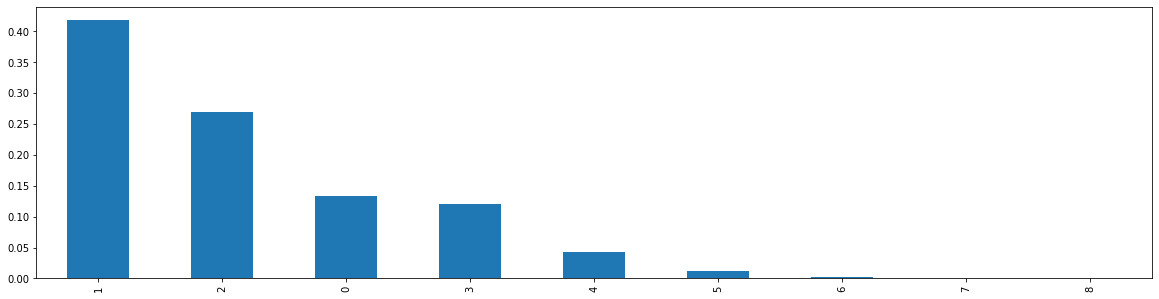

In [ ]:
data['Total'].value_counts(normalize = True).plot(kind='bar')

**Observation:**

1. More than 40% of the reviews only have 1 tag (meaning that these are reviews that were talking about 1 subject only.

2. Most of the reviews (40% & 25%) were referring to either 1 or 2 topics in a single review row.

**Only keep rows that have labels**

In [ ]:
# Only keep rows that have labels
data = data[data.Total != 0]

**Print the counts of each tags**

In [ ]:
print(data['Room_view_related'].value_counts())
print(data['Room_size_comfort_related'].value_counts()) 
print(data['Bathroom_related'].value_counts()) 
print(data['Facility_related'].value_counts())
print(data['Service_related'].value_counts()) 
print(data['Food_Dining_related'].value_counts()) 
print(data['Stay_Experience_related'].value_counts()) 
print(data['Nightlife_related'].value_counts())
print(data['Location_Accessibility_related'].value_counts()) 
print(data['Internet_related'].value_counts()) 

0    445075
1     27005
Name: Room_view_related, dtype: int64
0    346998
1    125082
Name: Room_size_comfort_related, dtype: int64
0    417308
1     54772
Name: Bathroom_related, dtype: int64
0    415651
1     56429
Name: Facility_related, dtype: int64
0    290834
1    181246
Name: Service_related, dtype: int64
0    353863
1    118217
Name: Food_Dining_related, dtype: int64
0    431815
1     40265
Name: Stay_Experience_related, dtype: int64
0    424622
1     47458
Name: Nightlife_related, dtype: int64
0    282554
1    189526
Name: Location_Accessibility_related, dtype: int64
0    455838
1     16242
Name: Internet_related, dtype: int64


**Locating the tagged columns**

In [ ]:
df_issues = data.iloc[:, -10:-1]
df_issues

,Room_size_comfort_related,Bathroom_related,Facility_related,Service_related,Food_Dining_related,Stay_Experience_related,Nightlife_related,Location_Accessibility_related,Internet_related
1,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,1,0,0
5,0,0,1,0,1,0,0,0,0
6,1,1,0,0,1,0,0,0,0
7,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
545176,0,0,0,0,1,0,0,0,0
545177,0,0,0,1,0,0,0,0,0
545178,0,0,0,0,1,0,0,0,0
545179,1,0,0,0,0,0,0,0,0


### **Topic Distribution in the Reviews**

Text(0.5, 1.0, 'Topic Distribution in Reviews')

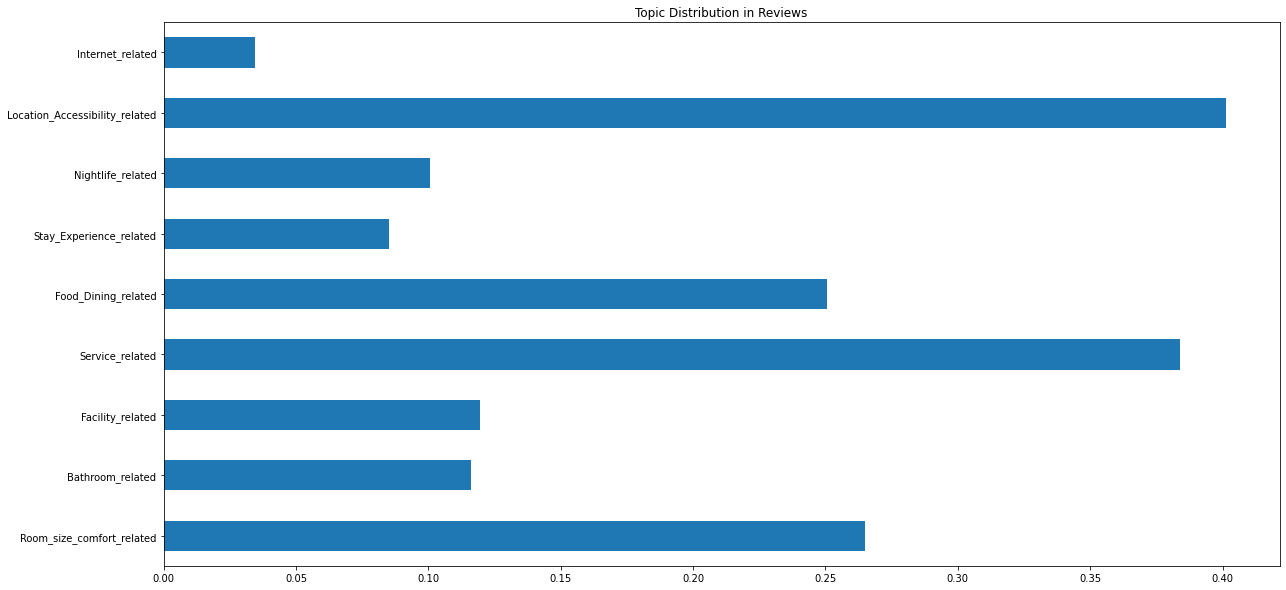

In [ ]:
k = df_issues.sum()/len(df_issues)
k.plot.barh(figsize=(20,10))
plt.title("Topic Distribution in Reviews")

**Observation:**

1. Generally, **Location_Accessibility, Service & Room Size** related reviews were the most common amongst all the reviews.

2. **Internet, Nightlife and stay experience** related reviews were the least common amongst the 10 topics identified.

### **Negative reviews Topic Distribution**

In [ ]:
# Check -ve reviews topic distribution 
data_neg = data[data['Sentiments'] == "Negative"]
data_neg.head(5)

,Review_Date,Hotel_Country,Hotel_Name,Sentiments,Reviewer_Nationality,Review,cleaned_Reviews,Room_view_related,Room_size_comfort_related,Bathroom_related,Facility_related,Service_related,Food_Dining_related,Stay_Experience_related,Nightlife_related,Location_Accessibility_related,Internet_related,Total
1,2017-07-17,Netherlands,Hotel Arena,Negative,United Kingdom,Cleaner did not change our sheet and duvet ev...,cleaner change sheet duvet everyday made bed a...,0,1,0,0,0,0,0,0,0,0,1
4,2017-08-07,Netherlands,Hotel Arena,Negative,Norway,The aircondition makes so much noise and its ...,aircondition make noise hard sleep night,0,0,0,0,0,0,1,1,0,0,2
5,2017-06-07,Netherlands,Hotel Arena,Negative,United Kingdom,The floor in my room was filfy dirty Very bas...,floor room filfy dirty basic room old tv room ...,0,0,0,1,0,1,0,0,0,0,2
6,2017-06-30,Netherlands,Hotel Arena,Negative,Ireland,We did not like the fact that breakfast was n...,like fact breakfast included although pay extr...,0,1,1,0,0,1,0,0,0,0,3
7,2017-06-20,Netherlands,Hotel Arena,Negative,Australia,We had issues with our electronic key everyda...,issue electronic key everyday deactivated kept...,0,1,0,1,0,0,0,0,0,0,2


**Locating the tagged columns**

In [ ]:
df_neg_issues = data_neg.iloc[:, -10:-1]
df_neg_issues

,Room_size_comfort_related,Bathroom_related,Facility_related,Service_related,Food_Dining_related,Stay_Experience_related,Nightlife_related,Location_Accessibility_related,Internet_related
1,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,1,0,0
5,0,0,1,0,1,0,0,0,0
6,1,1,0,0,1,0,0,0,0
7,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
225531,0,0,0,0,1,0,0,0,0
225532,0,0,0,0,0,1,0,0,0
225533,0,0,0,0,0,0,0,0,1
225534,0,0,0,0,0,0,0,1,0


**Plotting topic distribution in Negative Reviews**

Text(0.5, 1.0, 'Topic Distribution in Negative Reviews')

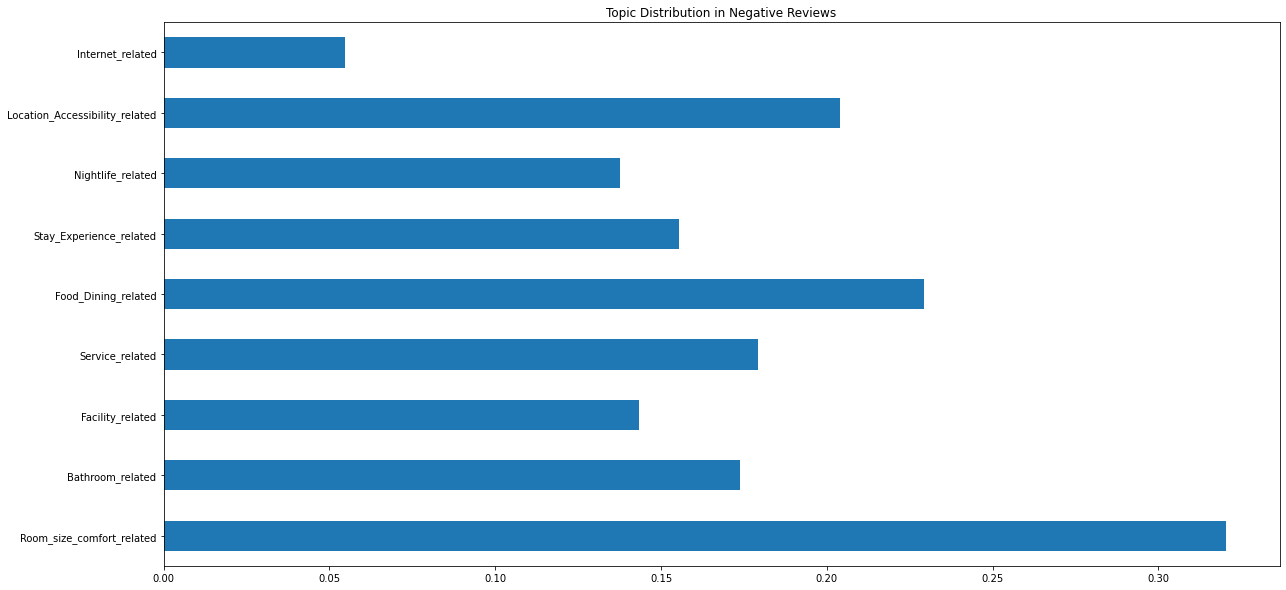

In [ ]:
k = df_neg_issues.sum()/len(df_neg_issues)
k.plot.barh(figsize=(20,10))
plt.title("Topic Distribution in Negative Reviews")

**Observation:**

1. Generally, **Room_size, Food_Dining, and Location_Accessiblity** related reviews were the most common amongst all the negative reviews.

2. **Internet, Nightlife and facility** related reviews were the least common amongst the 10 topics identified in the negative reviews.

### **Positive Reviews Topic Distribution**

In [ ]:
# Check +ve reviews topic distribution 
data_pos = data[data['Sentiments'] == "Positive"]
data_pos.head(5)

,Review_Date,Hotel_Country,Hotel_Name,Sentiments,Reviewer_Nationality,Review,cleaned_Reviews,Room_view_related,Room_size_comfort_related,Bathroom_related,Facility_related,Service_related,Food_Dining_related,Stay_Experience_related,Nightlife_related,Location_Accessibility_related,Internet_related,Total
225538,2017-03-08,Netherlands,Hotel Arena,Positive,Russia,Only the park outside of the hotel was beauti...,park outside hotel beautiful,0,0,0,1,0,0,0,0,0,0,1
225539,2017-07-31,Netherlands,Hotel Arena,Positive,Australia,Location was good and staff were ok It is cut...,location good staff ok cute hotel breakfast ra...,0,0,0,0,1,1,0,0,1,0,3
225540,2017-07-31,Netherlands,Hotel Arena,Positive,United Kingdom,Great location in nice surroundings the bar a...,great location nice surroundings bar restauran...,0,0,0,0,0,1,0,1,1,0,3
225541,2017-07-24,Netherlands,Hotel Arena,Positive,Poland,Good restaurant with modern design great chil...,good restaurant modern design great chill plac...,0,0,0,1,0,1,0,0,0,0,2
225542,2017-08-07,Netherlands,Hotel Arena,Positive,Norway,The room was big enough and the bed is good T...,room big enough bed good breakfast food servic...,0,1,0,1,1,1,0,0,1,0,5


**Locating the tagged columns**

In [ ]:
df_pos_issues = data_pos.iloc[:, -10:-1]
df_pos_issues

,Room_size_comfort_related,Bathroom_related,Facility_related,Service_related,Food_Dining_related,Stay_Experience_related,Nightlife_related,Location_Accessibility_related,Internet_related
225538,0,0,1,0,0,0,0,0,0
225539,0,0,0,1,1,0,0,1,0
225540,0,0,0,0,1,0,1,1,0
225541,0,0,1,0,1,0,0,0,0
225542,1,0,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...
545176,0,0,0,0,1,0,0,0,0
545177,0,0,0,1,0,0,0,0,0
545178,0,0,0,0,1,0,0,0,0
545179,1,0,0,0,0,0,0,0,0


**Plotting topic distribution in Positive Reviews**

Text(0.5, 1.0, 'Topic Distribution in Positive Reviews')

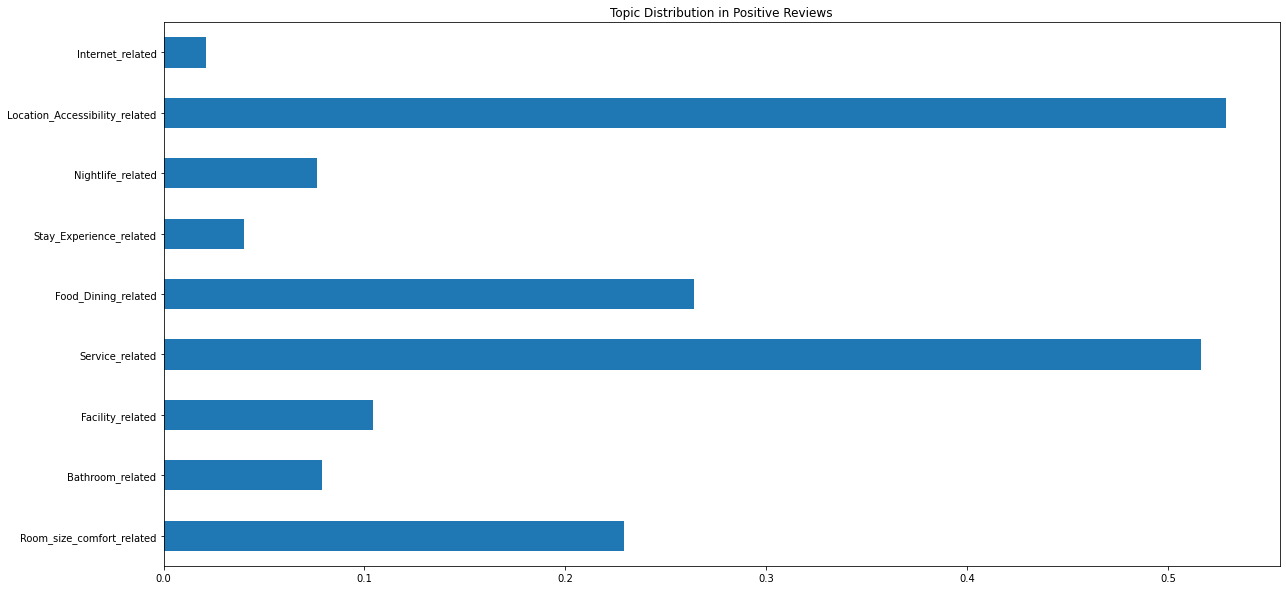

In [ ]:
k = df_pos_issues.sum()/len(df_pos_issues)
k.plot.barh(figsize=(20,10))
plt.title("Topic Distribution in Positive Reviews")

**Observation:**

1. Generally, **Location_Accessilbity, Service, and Food_Dining** related reviews were the most common amongst all the positive reviews.

2. **Internet, Stay_Experience, Nightlife** related reviews were the least common amongst the 10 topics identified in the positive reviews.

**Output Reviews tagged with Topics**

In [ ]:
output_loc = '/content/drive/MyDrive/Colab Notebooks/Hotel_Analysis/Hotel_Datasets/515k_Hotel_Reviews_TOPIC_DISTRIBUTION.csv'
data.to_csv(output_loc, index = False)